In [1]:
from adb.adb import read_symbol
import pandas as pd
import datetime as dt
from homer.base import BBGTicker
from tyche.seasonality import SEAGStudy
import seaborn as sns; sns.set()

c:\users\quant\anaconda3\envs\tyche\lib\site-packages\arctic\_util.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
c:\users\quant\anaconda3\envs\tyche\lib\site-packages\arctic\store\_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


ModuleNotFoundError: No module named 'seaborn'

In [2]:
s = SEAGStudy('XAUUSD CURNCY', 2000,2020)

'Details'
OrderedDict([('start_dt', datetime.date(2010, 6, 1)),
             ('end_dt', datetime.date(2020, 7, 17)),
             ('num_yrs', 11),
             ('num_mths', 122)])


In [3]:
s.df

Mean  NumAboveZero  RatioAboveZero        Max        Min  \
Mth                                                                       
April      1.373379             6        0.600000   9.177867  -7.719467   
August     3.846201             8        0.800000  12.215857  -3.067262   
December  -0.448254             5        0.500000   4.975853 -10.392235   
February   1.059483             4        0.400000  10.799327  -5.497176   
January    3.712851             8        0.800000  10.706504  -6.237116   
July       0.657375             7        0.636364   8.460600  -6.529620   
June       0.863975             6        0.545455   8.769707 -10.993432   
March     -0.709807             4        0.400000   1.502481  -3.192219   
May       -1.976618             4        0.400000   2.595316  -6.266105   
November  -1.974020             4        0.400000   1.879984  -8.143532   
October    0.667085             5        0.500000   5.620746  -3.105868   
September -2.068612             3        0.300000   4.897190 -11.054448   

             Median       Std  
Mth                            
April      0.328963  4.725165  
August     4.439013  4.500392  
December   0.567697  4.518295  
February  -0.460392  5.367386  
January    4.145486  4.662484  
July       1.349869  4.681180  
June       2.318342  5.763900  
March     -0.713440  1.543854  
May       -1.550115  3.299871  
November  -0.392864  3.634510  
October    0.789209  3.111180  
September -2.450709  4.842831

In [4]:
s.seag.head()

Diff        Mth
date                           
2010-06-01  2.318342       June
2010-07-01 -4.944343       July
2010-08-02  5.548175     August
2010-09-01  4.897190  September
2010-10-01  3.888362    October

In [5]:
s.seag['Yr'] = s.seag.index.year
s.seag['MthNum'] = s.seag['Diff'].index.month

In [6]:
s.seag.head()

Diff        Mth    Yr  MthNum
date                                         
2010-06-01  2.318342       June  2010       6
2010-07-01 -4.944343       July  2010       7
2010-08-02  5.548175     August  2010       8
2010-09-01  4.897190  September  2010       9
2010-10-01  3.888362    October  2010      10

In [11]:
trial = s.seag

In [12]:
trial = trial.pivot('Yr','MthNum','Diff')

In [13]:
trial

MthNum         1          2         3         4         5          6   \
Yr                                                                      
2010          NaN        NaN       NaN       NaN       NaN   2.318342   
2011    -6.237116   5.904026  1.502481  9.177867 -1.816961  -2.314860   
2012    10.706504  -2.364978 -1.686734 -0.218772 -6.266105   2.367175   
2013    -0.695377  -5.054968  1.132558 -7.719467 -6.023362 -10.993432   
2014     3.552856   6.598997 -3.192219  0.590333 -3.244089   6.217840   
2015     8.394336  -5.497176 -2.437476  0.067592  0.523481  -1.503886   
2016     5.222497  10.799327 -0.477932  4.932994 -6.007734   8.769707   
2017     5.226014   3.115502  0.058472  1.451037  0.038630  -2.152224   
2018     3.198435  -1.985115  0.546166 -0.786683 -1.283270  -3.535591   
2019     3.022246  -0.600189 -1.594432 -0.692467  1.717919   7.896570   
2020     4.738115  -0.320595 -0.948948  6.931359  2.595316   2.434086   

MthNum        7          8          9         10        11         12  
Yr                                                                     
2010   -4.944343   5.548175   4.897190  3.888362  1.879984   2.535618  
2011    8.460600  12.215857 -11.054448  5.620746  1.830957 -10.392235  
2012    1.062844   4.782520   4.789357 -2.919770 -0.329527  -2.314801  
2013    7.309627   5.297039  -4.742689 -0.443956 -5.278154  -4.030796  
2014   -3.372132   0.368785  -6.152173 -2.914373 -0.456200   1.475389  
2015   -6.529620   3.548228  -1.747260  2.431390 -6.758615  -0.339995  
2016    2.222558  -3.067262   0.527132 -3.105868 -8.143532  -2.191424  
2017    2.221685   4.095507  -3.154159 -0.657103  0.279995   2.179591  
2018   -2.204132  -1.868434  -0.814552  2.022374  0.474168   4.975853  
2019    1.349869   7.541591  -3.234519  2.749048 -3.239281   3.620259  
2020    1.654164        NaN        NaN       NaN       NaN        NaN

In [41]:
trial = trial.round({x:1 for x in range(1,13)})

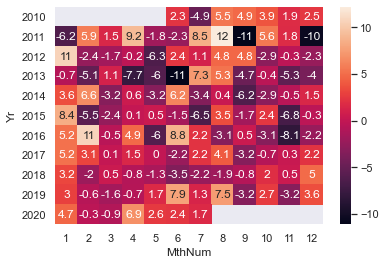

In [42]:
ax = sns.heatmap(trial, annot=True)

In [43]:
from matplotlib.colors import ListedColormap

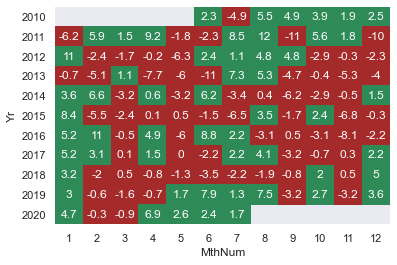

In [44]:
cmap=ListedColormap(['brown', 'seagreen'])
ax = sns.heatmap(trial, annot=True,cmap=cmap,cbar=False)